In [42]:
import torch
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import matplotlib.pyplot as plt
import torch
from PIL import Image
from torchvision import models
from torchvision import transforms

dir(models)

resnet = models.resnet101(pretrained=True)
alexnet = models.alexnet(pretrained=True)

In [43]:
preprocess = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize(
mean=[0.485, 0.456, 0.406],
std=[0.229, 0.224, 0.225]
)])


picture_directory = 'cat_pictures'
pictures = []

for file in os.listdir(picture_directory):
    # Check if the file is a picture
    # Open the picture using the PIL library
    picture = Image.open(os.path.join(picture_directory, file))
    # Append the picture to the list
    pictures.append(picture)

In [44]:
preprocessed_pictures = []
for picture in pictures:
    preprocessed_picture = preprocess(picture)
    batch_t = torch.unsqueeze(preprocessed_picture, 0)
    preprocessed_pictures.append(batch_t)


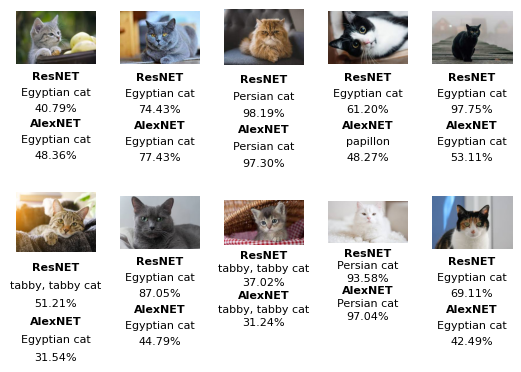

In [47]:
resnet.eval()

top5_resNET = []
for batch_t in preprocessed_pictures:
    out = resnet(batch_t)
    _, index = torch.max(out, 1)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    _, indices = torch.sort(out, descending=True)
    top_5_resNet = [(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]
    top5_resNET.append(top_5_resNet)


alexnet.eval()
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]


top5_AlexNET = []
for batch_t in preprocessed_pictures:
    out = alexnet(batch_t)
    _, index = torch.max(out, 1)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    _, indices = torch.sort(out, descending=True)
    top_5_AlexNet = [(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]
    top5_AlexNET.append(top_5_AlexNet)


fig, axs = plt.subplots(nrows=2, ncols=5)
    # Iterate through each picture and plot it on the corresponding subplot
i = 0
while i < len(pictures):


    row = i // 5  # calculate the row index
    col = i % 5   # calculate the column index
    label_ResNet, confidence_ResNet = top5_resNET[i][0]
    label_AlexNet, confidence_AlexNet = top5_AlexNET[i][0]

    axs[row, col].imshow(pictures[i])
    axs[row, col].set_axis_off()

    axs[row, col].text(0.5, -0.3, f"ResNET", 
                        transform=axs[row, col].transAxes, ha='center', fontsize=8, weight='bold')
    axs[row, col].text(0.5, -0.6, f"{label_ResNet}", 
                        transform=axs[row, col].transAxes, ha='center', fontsize=8)
    axs[row, col].text(0.5, -0.9, f"{confidence_ResNet:.2f}%", 
                        transform=axs[row, col].transAxes, ha='center', fontsize=8)
    
    axs[row, col].text(0.5, -1.2, f"AlexNET", 
                        transform=axs[row, col].transAxes, ha='center', fontsize=8, weight='bold')
    axs[row, col].text(0.5, -1.5, f"{label_AlexNet}", 
                        transform=axs[row, col].transAxes, ha='center', fontsize=8)
    axs[row, col].text(0.5, -1.8, f"{confidence_AlexNet:.2f}%", 
                        transform=axs[row, col].transAxes, ha='center', fontsize=8)

    plt.subplots_adjust(wspace=0.3, hspace=0)
    i += 1

# Show the subplot
plt.show()
